In [19]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
# load data into a pandas dataframe
df = pd.read_csv('doctor.csv', encoding='ISO-8859-1')

In [21]:
df.head()

,name,rating,experience,location,speciality,charges
0,Kholi,7.9,39,Chembur East,Neurologist,1500
1,Ramesh,9.1,17,Andheri West,Psychiatrist,2000
2,Naazneen,9.8,18,Sion East,Psychiatrist,1500
3,Darpan,2.0,13,Mahim,Neurologist,1800
4,Priyanaka,9.0,36,Mulund West,Neurologist,2000


In [22]:
df.shape

(54, 6)

In [23]:

df.isnull().sum()

name          0
rating        6
experience    0
location      0
speciality    0
charges       0
dtype: int64

<AxesSubplot:xlabel='rating', ylabel='Density'>

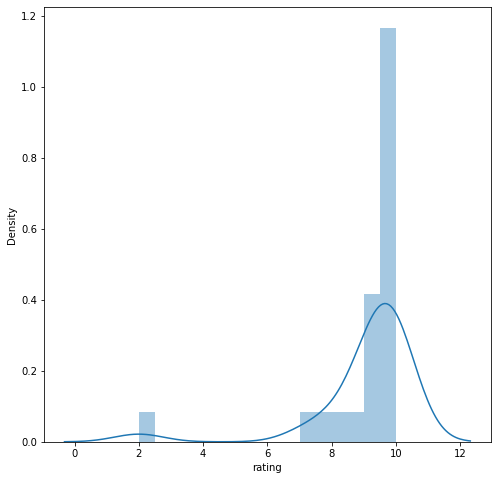

In [24]:

# analyse the distribution of data in the salary
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(df.rating)
     

In [25]:
df['rating'].fillna(df['rating'].median(),inplace=True)

In [26]:
df.isnull().sum()

name          0
rating        0
experience    0
location      0
speciality    0
charges       0
dtype: int64

In [27]:
df['rating'].value_counts()

10.0    15
9.6     10
9.2      3
9.9      3
9.7      3
9.8      2
2.0      2
9.0      2
9.3      2
8.3      2
9.4      2
7.5      1
9.5      1
8.7      1
7.9      1
7.3      1
9.1      1
8.6      1
7.1      1
Name: rating, dtype: int64

In [28]:
# extract features
features = df[['rating', 'experience']]

In [29]:
# convert location to numerical values
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
features['location'] = df['location']
# df.loc[:, 'location'] = df['location']


In [30]:
features.head(10)

,rating,experience,location
0,7.9,39,7
1,9.1,17,1
2,9.8,18,24
3,2.0,13,16
4,9.0,36,20
5,8.6,13,20
6,10.0,43,22
7,9.3,9,16
8,10.0,19,2
9,9.6,27,20


In [31]:
features.describe()

,rating,experience,location
count,54.000000,54.000000,54.000000
mean,9.142593,18.018519,13.351852
std,1.582642,9.580820,8.000371
min,2.000000,3.000000,0.000000
25%,9.200000,12.250000,6.250000
50%,9.600000,16.000000,16.000000
75%,10.000000,23.000000,20.000000
max,10.000000,43.000000,25.000000


In [32]:


# separating the data and labels
X = features.drop(columns = 'rating', axis=1)
Y = features['rating']
     


In [33]:
scaler = StandardScaler()
scaler.fit(features)
X_standardized = scaler.transform(features)

In [34]:
print(X_standardized)

[[-7.92510534e-01  2.21050975e+00 -8.01399682e-01]
 [-2.71650406e-02 -1.07306298e-01 -1.55840696e+00]
 [ 4.19286497e-01 -1.95102361e-03  1.34345428e+00]
 [-4.55545921e+00 -5.28727398e-01  3.34111238e-01]
 [-9.09438317e-02  1.89444392e+00  8.38782757e-01]
 [-3.46058996e-01 -5.28727398e-01  8.38782757e-01]
 [ 5.46844079e-01  2.63193085e+00  1.09111852e+00]
 [ 1.00392542e-01 -9.50148497e-01  3.34111238e-01]
 [ 5.46844079e-01  1.03404251e-01 -1.43223908e+00]
 [ 2.91728915e-01  9.46246450e-01  8.38782757e-01]
 [ 5.46844079e-01  2.08759526e-01  8.38782757e-01]
 [ 5.46844079e-01  6.30180625e-01  1.09111852e+00]
 [ 2.91728915e-01 -6.34082672e-01 -4.43924022e-02]
 [ 3.66137504e-02 -2.12661573e-01  8.38782757e-01]
 [ 5.46844079e-01 -1.95102361e-03  8.38782757e-01]
 [ 4.83065288e-01 -4.23372123e-01  1.21728640e+00]
 [ 5.46844079e-01 -1.26621432e+00 -1.70560282e-01]
 [-5.37395369e-01 -7.39437947e-01  5.86446997e-01]
 [-9.09438317e-02  7.35535900e-01  3.34111238e-01]
 [-5.37395369e-01 -4.23372123e-

In [35]:
# train a KNN model
knn = NearestNeighbors(n_neighbors=53)
knn.fit(X_standardized)


NearestNeighbors(n_neighbors=53)

In [36]:
# recommend doctors to a user
user = [10, 5, 1] 
distances, indices = knn.kneighbors([user])
if 'name' in df.columns:
    # rest of the code
    for i in indices[0]:
      print(df.iloc[i]['name'])
      # print(df.iloc[i]["rating"],end=" ")
      # print(df.iloc[i]["experience"],end=" ")
      # print(df.iloc[i]["location"])
      
else:
    print("The column 'name' is not present in the dataframe.")
# display the recommended doctors

Rima
Paresh
Adukia
Rajesh 
Nikunj
Dean 
Priyanaka
Akanksha  
Parul 
Jalpa
Kader  
Naazneen 
Parijat 
Anita 
Kaustubh 
Sureka  
Prakhar 
Aditi 
Pavan
Chetan 
Smit
Sagar
Sudheendra 
Adita 
Anjali 
Sneha   
Prashant 
Smruti
Nilesh
Ankita
Jyoti
Shyam 
Rohann 
Sumedha 
Sunanda
Santosh 
Kholi
Vinod
Chinmay 
Ketan 
Pruthviraj
Abhidha
Ramesh 
Shirish
Austin 
Dhanashri 
Priyadarshani
Aditya 
Anshu 
Rohit 
Pankaj  
Pradeep 
Darpan
